# Problem Statement
#### In this assignment students will build the random forest model after normalizing the variable to house pricing from boston data set.
#### Following the code to get data into the environment:

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
boston = datasets.load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target

In [17]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,6.32e-03,18.0,2.31,0.0,0.54,6.58,65.2,4.09,1.0,296.0,15.3,396.90,4.98
1,2.73e-02,0.0,7.07,0.0,0.47,6.42,78.9,4.97,2.0,242.0,17.8,396.90,9.14
2,2.73e-02,0.0,7.07,0.0,0.47,7.18,61.1,4.97,2.0,242.0,17.8,392.83,4.03
3,3.24e-02,0.0,2.18,0.0,0.46,7.00,45.8,6.06,3.0,222.0,18.7,394.63,2.94
4,6.91e-02,0.0,2.18,0.0,0.46,7.15,54.2,6.06,3.0,222.0,18.7,396.90,5.33


In [18]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [19]:
features.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [20]:
targets.shape

(506,)

In [21]:
# Combining the data
names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
dataset = pd.DataFrame(data=np.c_[boston['data'], boston['target']], columns=names )
dataset.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,6.32e-03,18.0,2.31,0.0,0.54,6.58,65.2,4.09,1.0,296.0,15.3,396.90,4.98,24.0
1,2.73e-02,0.0,7.07,0.0,0.47,6.42,78.9,4.97,2.0,242.0,17.8,396.90,9.14,21.6
2,2.73e-02,0.0,7.07,0.0,0.47,7.18,61.1,4.97,2.0,242.0,17.8,392.83,4.03,34.7
3,3.24e-02,0.0,2.18,0.0,0.46,7.00,45.8,6.06,3.0,222.0,18.7,394.63,2.94,33.4
4,6.91e-02,0.0,2.18,0.0,0.46,7.15,54.2,6.06,3.0,222.0,18.7,396.90,5.33,36.2


In [22]:
# descriptions
#pd.set_option('precision', 0)
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.06e+02,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.59e+00,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60e+00,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,6.32e-03,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,8.20e-02,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,2.57e-01,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.65e+00,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,8.90e+01,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [23]:
# descriptions
pd.set_option('precision', 1)
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.1e+02,506.0,506.0,5.1e+02,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,3.6e+00,11.4,11.1,6.9e-02,0.6,6.3,68.6,3.8,9.5,408.2,18.5,356.7,12.7,22.5
std,8.6e+00,23.3,6.9,2.5e-01,0.1,0.7,28.1,2.1,8.7,168.5,2.2,91.3,7.1,9.2
min,6.3e-03,0.0,0.5,0.0e+00,0.4,3.6,2.9,1.1,1.0,187.0,12.6,0.3,1.7,5.0
25%,8.2e-02,0.0,5.2,0.0e+00,0.4,5.9,45.0,2.1,4.0,279.0,17.4,375.4,6.9,17.0
50%,2.6e-01,0.0,9.7,0.0e+00,0.5,6.2,77.5,3.2,5.0,330.0,19.1,391.4,11.4,21.2
75%,3.6e+00,12.5,18.1,0.0e+00,0.6,6.6,94.1,5.2,24.0,666.0,20.2,396.2,17.0,25.0
max,8.9e+01,100.0,27.7,1.0e+00,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,38.0,50.0


In [24]:
# descriptions
pd.set_option('precision', 2)
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.06e+02,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.59e+00,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60e+00,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,6.32e-03,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,8.20e-02,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,2.57e-01,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.65e+00,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,8.90e+01,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [30]:
#sns.pairplot(dataset)

In [26]:
corr = dataset.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.40,-5.53e-02,0.42,-0.22,0.35,-0.38,6.22e-01,0.58,0.29,-0.38,0.45,-0.39
ZN,-0.20,1.00,-0.53,-4.27e-02,-0.52,0.31,-0.57,0.66,-3.12e-01,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.40,-0.53,1.00,6.29e-02,0.76,-0.39,0.64,-0.71,5.95e-01,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00e+00,0.09,0.09,0.09,-0.10,-7.37e-03,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,9.12e-02,1.00,-0.30,0.73,-0.77,6.11e-01,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,9.13e-02,-0.30,1.00,-0.24,0.21,-2.10e-01,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,8.65e-02,0.73,-0.24,1.00,-0.75,4.56e-01,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-9.92e-02,-0.77,0.21,-0.75,1.00,-4.95e-01,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.62,-0.31,0.60,-7.37e-03,0.61,-0.21,0.46,-0.49,1.00e+00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-3.56e-02,0.67,-0.29,0.51,-0.53,9.10e-01,1.00,0.46,-0.44,0.54,-0.47


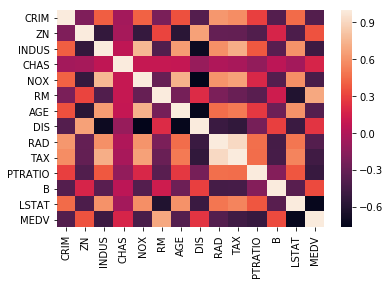

In [27]:
sns.heatmap(corr)

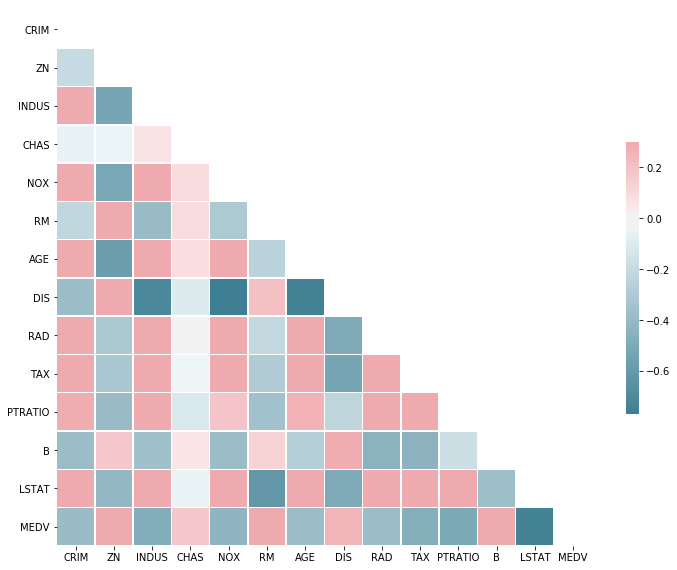

In [28]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [29]:
print( boston.DESCR )

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Text(0.5,1,'Price vs. # Rooms')

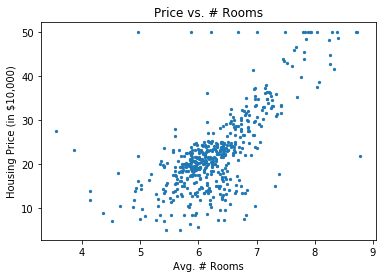

In [35]:
# Drawing the chart between Price vs average no of rooms.
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter( dataset['RM'], dataset['MEDV'], s=5 )
plt.xlabel( "Avg. # Rooms" )
plt.ylabel( "Housing Price (in $10,000)" )
plt.title( "Price vs. # Rooms")


<B>This shows that increase in average no of rooms increase the price also</B>

Text(0.5,1,'Price vs. # Lower Status')

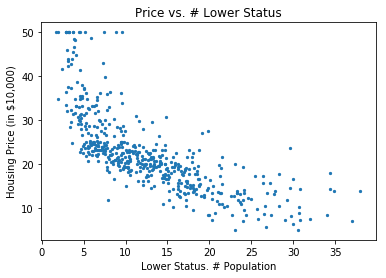

In [42]:
# Drawing the chart between Price vs average no of rooms.
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter( dataset['LSTAT'], dataset['MEDV'], s=5)
plt.xlabel( "Lower Status. # Population" )
plt.ylabel( "Housing Price (in $10,000)" )
plt.title( "Price vs. # Lower Status")


##### More is the Lower Status of Populaton, lesser is the price

<B> We are not plotting graph for others as its value are not co-related to the Price Negatively or Positively</B>

### Data Preprocessing
##### Splitting the data

In [61]:
X = dataset.drop('LSTAT', axis=1)
y = dataset['LSTAT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)


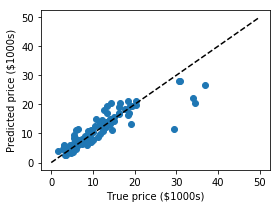

In [62]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor()
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)

predicted = clf.predict(X_test)
y_test_pred = predicted
expected = y_test

plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

In [64]:
import math
from math import sqrt
# Importing Regression Metrics - Performance Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('GradientBoostingRegressor -', 'RMSE Train:', math.sqrt(mean_squared_error(y_train_pred, y_train)))
print('GradientBoostingRegressor -', 'RMSE Test:' ,math.sqrt(mean_squared_error(y_test_pred, y_test)))  
print('GradientBoostingRegressor -', 'R2_score Train:', r2_score(y_train_pred, y_train))
print('GradientBoostingRegressor -', 'R2_score Test:' ,r2_score(y_test_pred, y_test))

GradientBoostingRegressor - RMSE Train: 1.6537539141392041
GradientBoostingRegressor - RMSE Test: 3.454942596221226
GradientBoostingRegressor - R2_score Train: 0.9372409354164829
GradientBoostingRegressor - R2_score Test: 0.6568459385504346


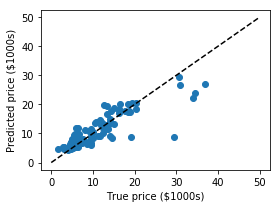

In [65]:
'''from sklearn.ensemble import RandomForestRegressor
    from sklearn.cross_validation import cross_val_score, ShuffleSplit

    boston = load_boston()
    X = boston["data"]
    Y = boston["target"]
    names = boston["feature_names"]

    rf = RandomForestRegressor(n_estimators=20, max_depth=4)
    scores = []
    for i in range(X.shape[1]):
        score = cross_val_score(rf, X[:, i:i + 1],
                                Y, scoring="r2", cv=ShuffleSplit(len(X), 3, .3))
        scores.append((round(np.mean(score), 3), names[i]))

    print sorted(scores, reverse=True) 
 '''   
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators=20, max_depth=4)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)

predicted = clf.predict(X_test)
y_test_pred = predicted
expected = y_test

plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

In [66]:
print('Random Forest Regresson -', 'RMSE Train:', math.sqrt(mean_squared_error(y_train_pred, y_train)))
print('Random Forest Regresson -', 'RMSE Test:' ,math.sqrt(mean_squared_error(y_test_pred, y_test)))  
print('Random Forest Regresson -', 'R2_score Train:', r2_score(y_train_pred, y_train))
print('Random Forest Regresson -', 'R2_score Test:' ,r2_score(y_test_pred, y_test))

Random Forest Regresson - RMSE Train: 2.6275844186846284
Random Forest Regresson - RMSE Test: 3.7783922769719287
Random Forest Regresson - R2_score Train: 0.8164160478334849
Random Forest Regresson - R2_score Test: 0.5632285769990709
